In [26]:
import numpy as np

In [27]:
def stat(dethi):
    scores = [ 
        {"ai_gemini_flash" : []},
        {"ai_gpt_4o_mini": []},
        {"ai_gpt_4o": []},
        {"ai_llama70b": []},
        {"ai_llama_8B": []},
        {"ai_deepseek_v3": []},
        {"ai_qwen_2.5_72b": []},
        {"ai_qwen_2.5_7b": []},
        {"ai_gemma27b": []},
    ]

    for i in dethi:
        level = i['level']
        number = i['number']
        idx = 0
        for j in i['eval']:
            if j['score'] == "0" or j['score'] == "1" or j['score'] == "2" or j['score'] == "3" or j['score'] == "4":
                score = int(j['score'])
                for k in scores[idx]:
                    if score == 0:
                        scores[idx][k].append((0,level,number))
                    elif score == 1:
                        scores[idx][k].append((1,level,number))
                    else:
                        for l in range(score):
                            scores[idx][k].append((1,level,number))
                idx+=1
            elif j['score'] == "0.5":
                for k in scores[idx]:
                    scores[idx][k].append((0.5,level,number))
                idx+=1
            else:
                idx+=1
    
    for i in scores:
        l = None
        for key in i:
            l = i[key]
        
        i['levels'] = {
            "1": {"correct" : 0, "incorrect" : 0},
            "2": {"correct" : 0, "incorrect" : 0},
            "3": {"correct" : 0, "incorrect" : 0},
            "4": {"correct" : 0, "incorrect" : 0},
            "5": {"correct" : 0, "incorrect" : 0},
        }

        i['len'] = len(l)
        i['sum'] = 0

        for j in l:
            s = j[0]
            i['sum'] += s

            level = j[1]

            for key in i['levels']:
                if key == level:
                    if s == 1:
                        i['levels'][key]['correct'] += 1
                    else:
                        i['levels'][key]['incorrect'] += 1

        i['rate'] = round((i['sum']/i['len'])*100,2)
    
    evaluation = {}
    levels = {
        "1": [],
        "2": [],
        "3": [],
        "4": [],
        "5": [],
    }

    for model in scores:
        model_name= None
        for key in model:
            model_name = key
            break

        model_acc = model['rate']
        evaluation[model_name] = model_acc

        l = model['levels']
        for key in l:
            level = key
            levels[level].append((model_name, l[key]['correct'], l[key]['incorrect']))
    
    return scores, evaluation, levels

# Đề minh họa 2025

- Gồm 22 câu: 12 câu trắc nghiệm, 4 câu điền đúng sai (mỗi câu có 4 ý), 6 câu điền đáp án.
- Nhận xét: 
    - Chủ yếu các câu trắc nghiệm thuộc câu hỏi nhận biết
    - Các câu trong điền đúng/sai, điền đáp án thuộc dạng vận dụng, ứng dụng kiến thức
    - Không có quá nhiều câu đánh đố.

In [28]:
import json
with open('..\Data_type2\de2025\deminhhoa2025_eval.json', 'r', encoding='utf-8') as f:
    de2025 = json.load(f)

In [29]:
len(de2025)

22

In [30]:
scores, evaluation, levels = res = stat(de2025)

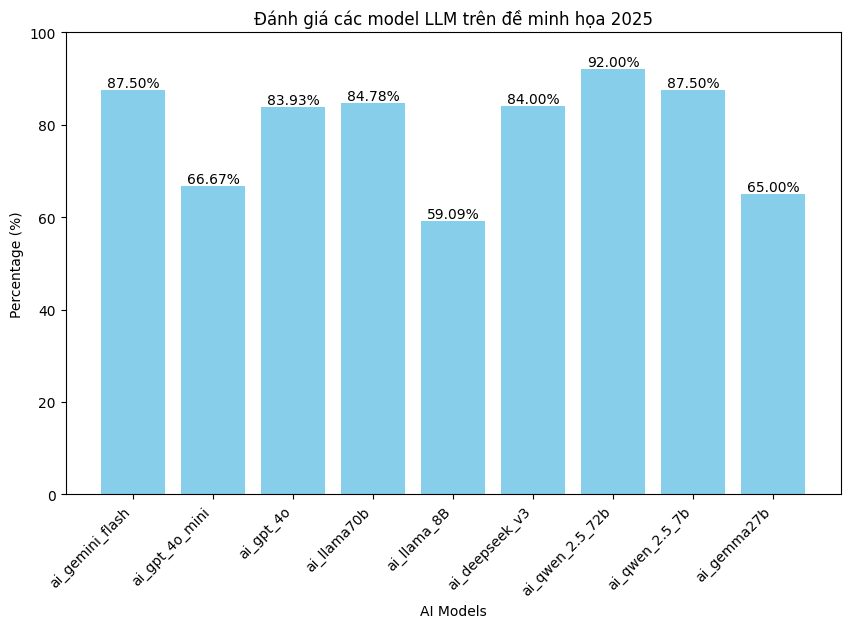

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
bars = plt.bar(evaluation.keys(), evaluation.values(), color='skyblue')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.2f}%", ha='center', va='bottom', fontsize=10)

plt.xlabel("AI Models")
plt.ylabel("Percentage (%)")
plt.title("Đánh giá các model LLM trên đề minh họa 2025")
plt.ylim(0, 100) 
plt.xticks(rotation=45, ha="right")

plt.show()

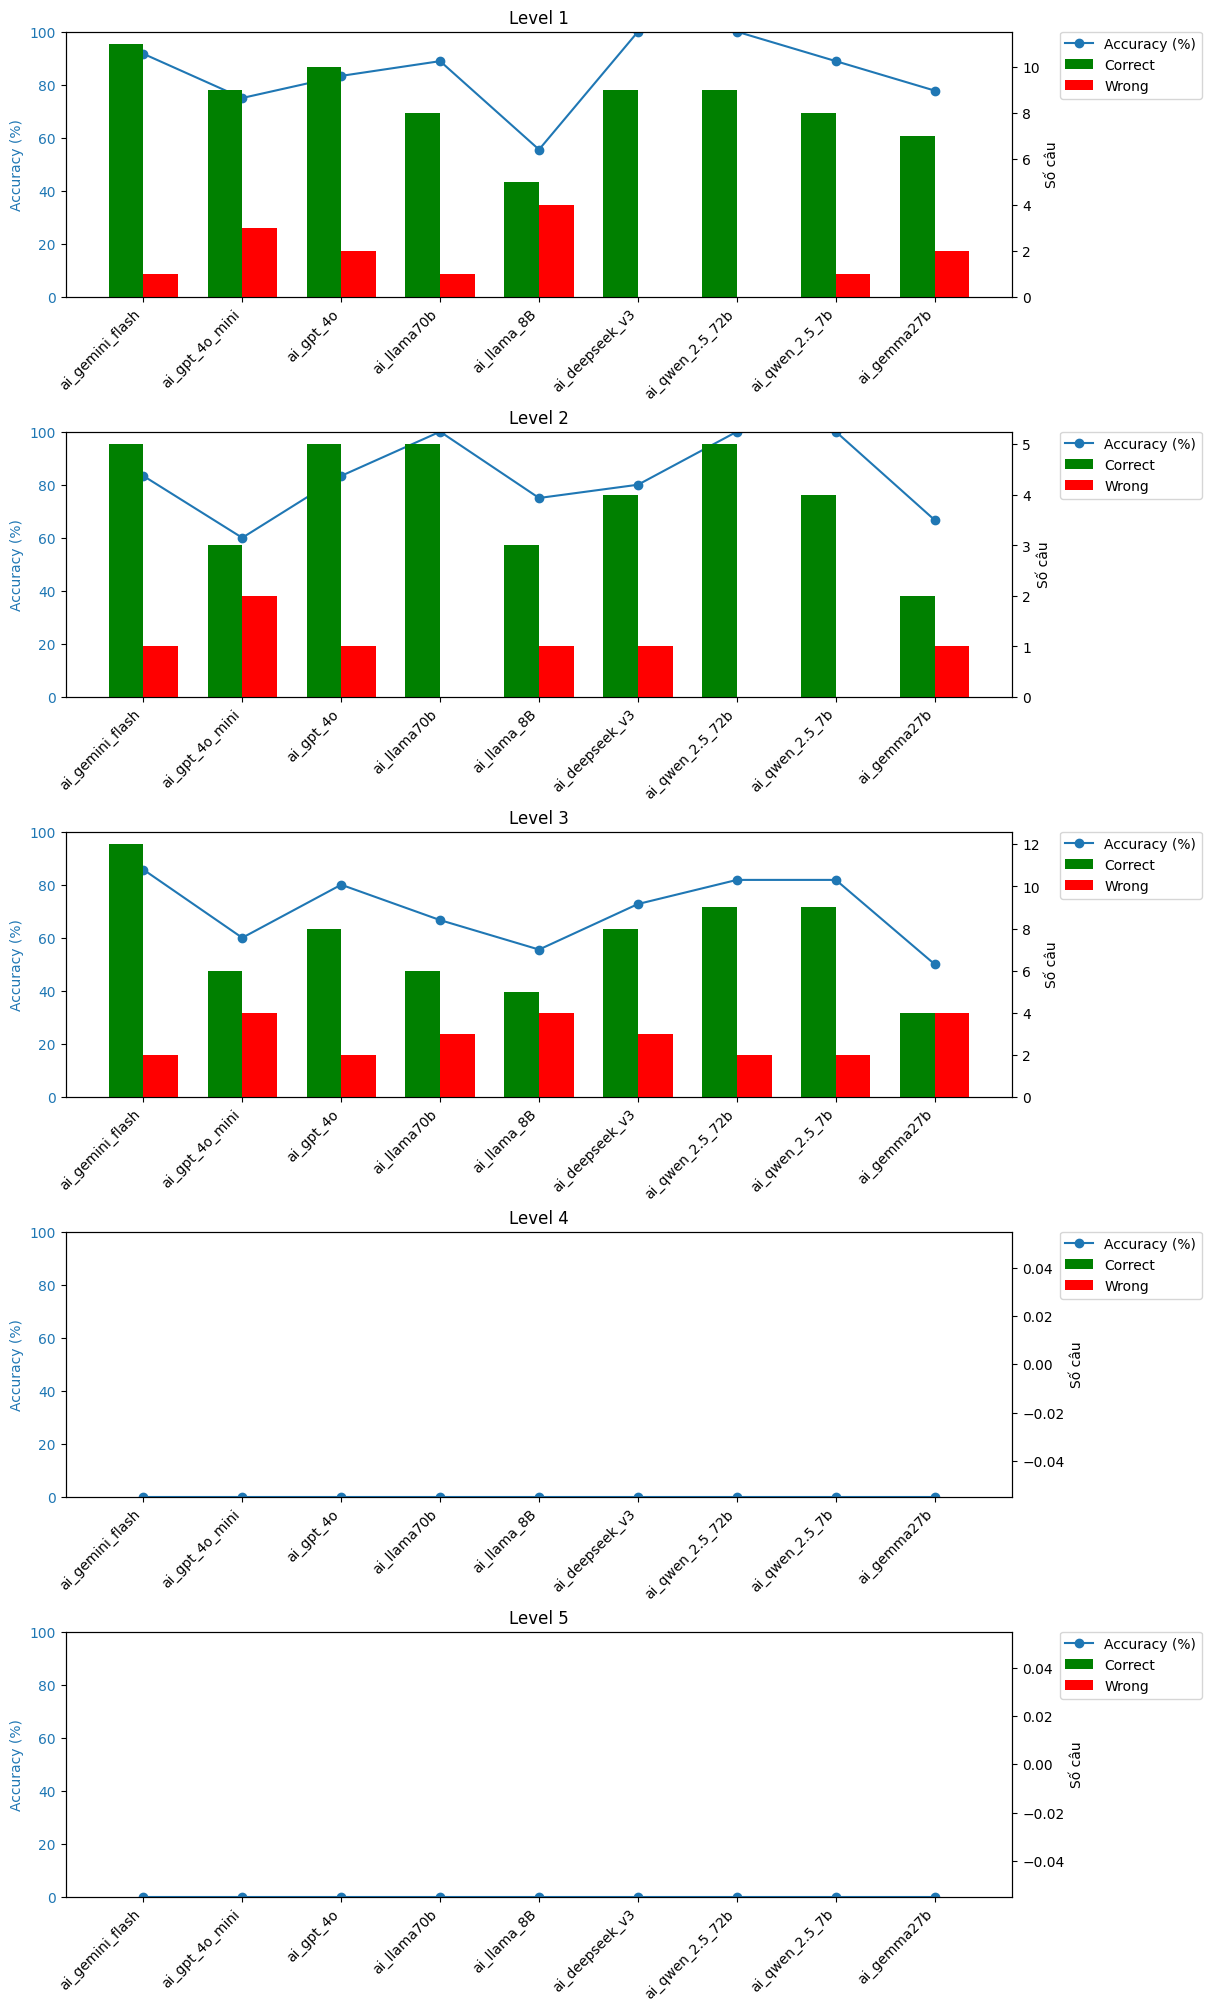

In [32]:
sorted_levels = sorted(levels.items(), key=lambda x: int(x[0]))

fig, axs = plt.subplots(len(sorted_levels), 1, figsize=(12, len(sorted_levels)*4), constrained_layout=True)
if len(sorted_levels) == 1:
    axs = [axs]

for ax, (level, models_data) in zip(axs, sorted_levels):
    # Tách dữ liệu cho từng model
    model_names = [item[0] for item in models_data]
    correct = [item[1] for item in models_data]
    wrong = [item[2] for item in models_data]
    total = [c + w for c, w in zip(correct, wrong)]
    accuracy = [(c / t * 100) if t > 0 else 0 for c, t in zip(correct, total)]
    
    x = np.arange(len(model_names))
    bar_width = 0.35

    ax2 = ax.twinx()
    
    ax.plot(x, accuracy, marker='o', color='tab:blue', label='Accuracy (%)')
    ax.set_ylabel('Accuracy (%)', color='tab:blue')
    ax.tick_params(axis='y', labelcolor='tab:blue')
    ax.set_ylim(0, 100)

    ax2.bar(x - bar_width/2, correct, bar_width, color='green', label='Correct')
    ax2.bar(x + bar_width/2, wrong, bar_width, color='red', label='Wrong')
    ax2.set_ylabel('Số câu', color='black')
    ax2.tick_params(axis='y', labelcolor='black')
    
    ax.set_title(f'Level {level}')
    ax.set_xticks(x)
    ax.set_xticklabels(model_names, rotation=45, ha='right')
    
    lines, labels = ax.get_legend_handles_labels()
    bars, bar_labels = ax2.get_legend_handles_labels()
    ax.legend(lines + bars, labels + bar_labels, loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)

plt.show()

# Đề 2024:
- Đề thi chính thức Toán THPT quốc gia năm 2024
- Đề gồm 50 câu hỏi chủ yếu quanh chương trình học lớp 12 (chương trình cũ)
    - Từ câu 1-30 : chủ yếu là câu hỏi nhận biết, thông hiểu
    - Từ câu 30-40 : vận dụng
    - Từ câu 40-50 : vận dụng cao 

In [34]:
import json
with open('..\Data_type2\de2024\dechinhthuc2024_eval.json', 'r', encoding='utf-8') as f:
    de2024 = json.load(f)

In [35]:
len(de2024)

50

In [36]:
scores, evaluation, levels = res = stat(de2024)

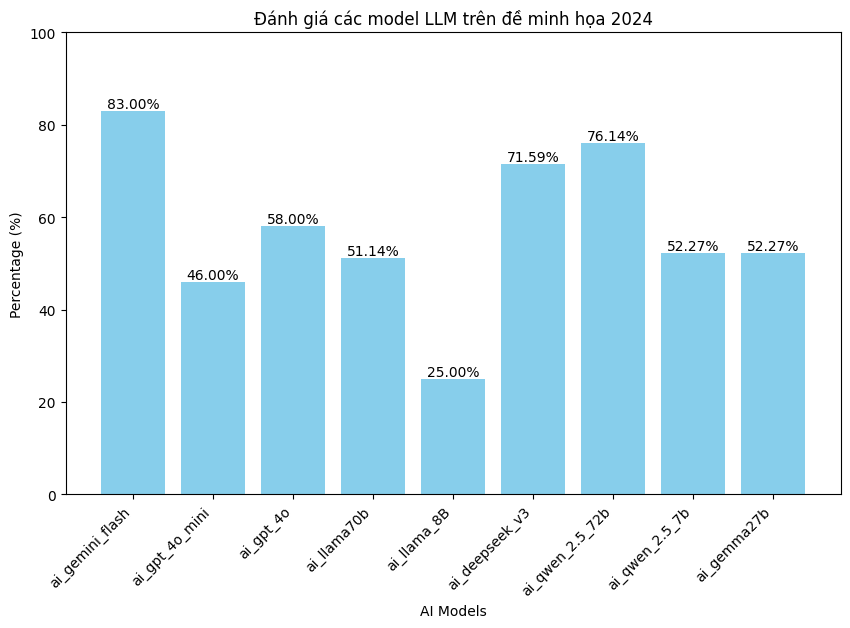

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
bars = plt.bar(evaluation.keys(), evaluation.values(), color='skyblue')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.2f}%", ha='center', va='bottom', fontsize=10)

plt.xlabel("AI Models")
plt.ylabel("Percentage (%)")
plt.title("Đánh giá các model LLM trên đề minh họa 2024")
plt.ylim(0, 100) 
plt.xticks(rotation=45, ha="right")

plt.show()

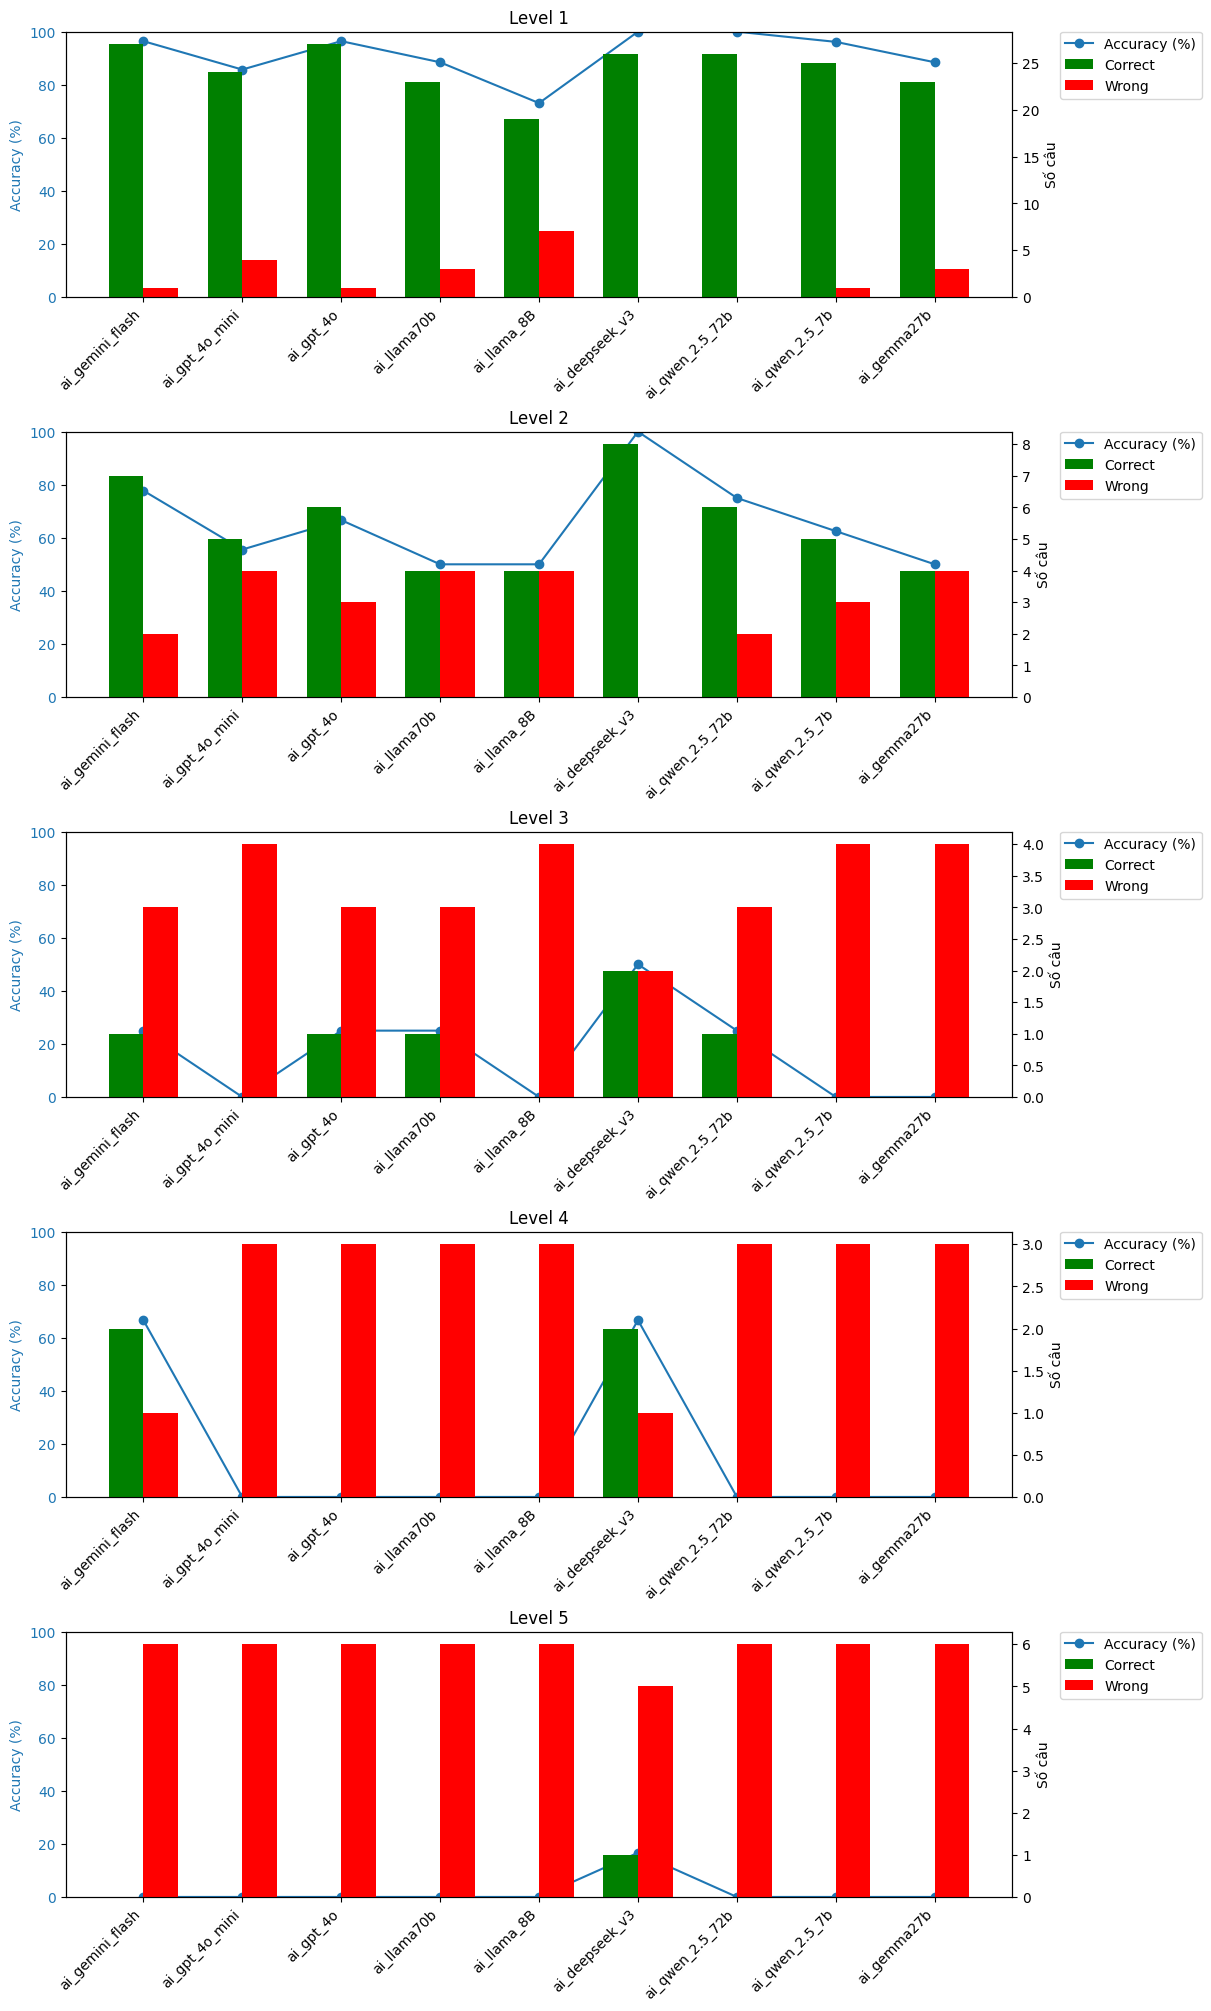

In [38]:
sorted_levels = sorted(levels.items(), key=lambda x: int(x[0]))

fig, axs = plt.subplots(len(sorted_levels), 1, figsize=(12, len(sorted_levels)*4), constrained_layout=True)
if len(sorted_levels) == 1:
    axs = [axs]

for ax, (level, models_data) in zip(axs, sorted_levels):
    # Tách dữ liệu cho từng model
    model_names = [item[0] for item in models_data]
    correct = [item[1] for item in models_data]
    wrong = [item[2] for item in models_data]
    total = [c + w for c, w in zip(correct, wrong)]
    accuracy = [(c / t * 100) if t > 0 else 0 for c, t in zip(correct, total)]
    
    x = np.arange(len(model_names))
    bar_width = 0.35

    ax2 = ax.twinx()
    
    ax.plot(x, accuracy, marker='o', color='tab:blue', label='Accuracy (%)')
    ax.set_ylabel('Accuracy (%)', color='tab:blue')
    ax.tick_params(axis='y', labelcolor='tab:blue')
    ax.set_ylim(0, 100)

    ax2.bar(x - bar_width/2, correct, bar_width, color='green', label='Correct')
    ax2.bar(x + bar_width/2, wrong, bar_width, color='red', label='Wrong')
    ax2.set_ylabel('Số câu', color='black')
    ax2.tick_params(axis='y', labelcolor='black')
    
    ax.set_title(f'Level {level}')
    ax.set_xticks(x)
    ax.set_xticklabels(model_names, rotation=45, ha='right')
    
    lines, labels = ax.get_legend_handles_labels()
    bars, bar_labels = ax2.get_legend_handles_labels()
    ax.legend(lines + bars, labels + bar_labels, loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)

plt.show()

# Đề 2028:
- Đề thi chính thức Toán THPT quốc gia năm 2018
- Đề gồm 50 câu hỏi chủ yếu quanh chương trình học lớp 12 (chương trình cũ)
    - Từ câu 1-20 : chủ yếu là câu hỏi nhận biết, thông hiểu
    - Từ câu 20-40 : vận dụng
    - Từ câu 40-50 : vận dụng cao 
- Đề được nhiều học sinh đánh giá là khó nhất trong nhiều năm, nhiều dạng bài khó, mât nhiều thời gian làm

In [40]:
import json
with open('..\Data_type2\de2018\dechinhthuc2018_eval.json', 'r', encoding='utf-8') as f:
    de2018 = json.load(f)

In [41]:
len(de2018)

50

In [42]:
scores, evaluation, levels = res = stat(de2018)

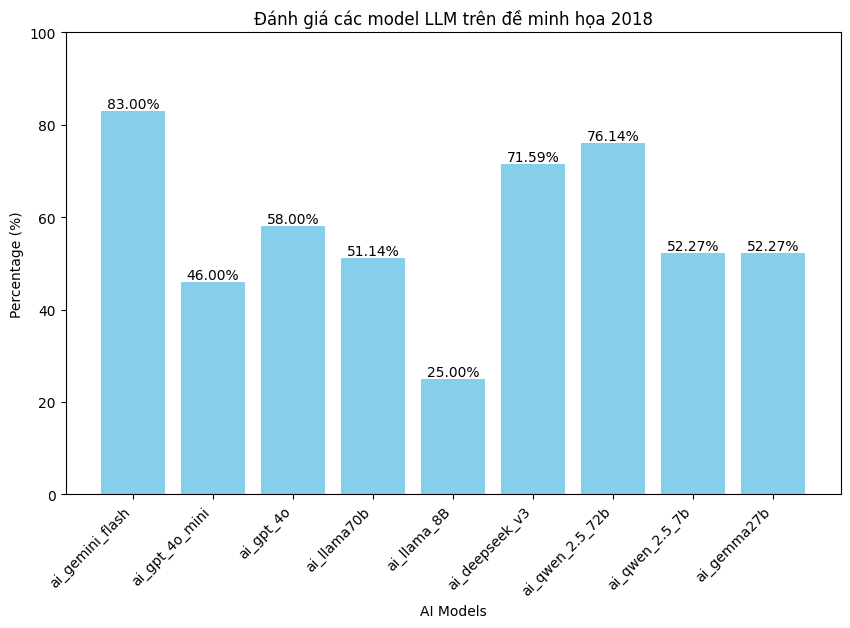

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
bars = plt.bar(evaluation.keys(), evaluation.values(), color='skyblue')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.2f}%", ha='center', va='bottom', fontsize=10)

plt.xlabel("AI Models")
plt.ylabel("Percentage (%)")
plt.title("Đánh giá các model LLM trên đề minh họa 2018")
plt.ylim(0, 100) 
plt.xticks(rotation=45, ha="right")

plt.show()

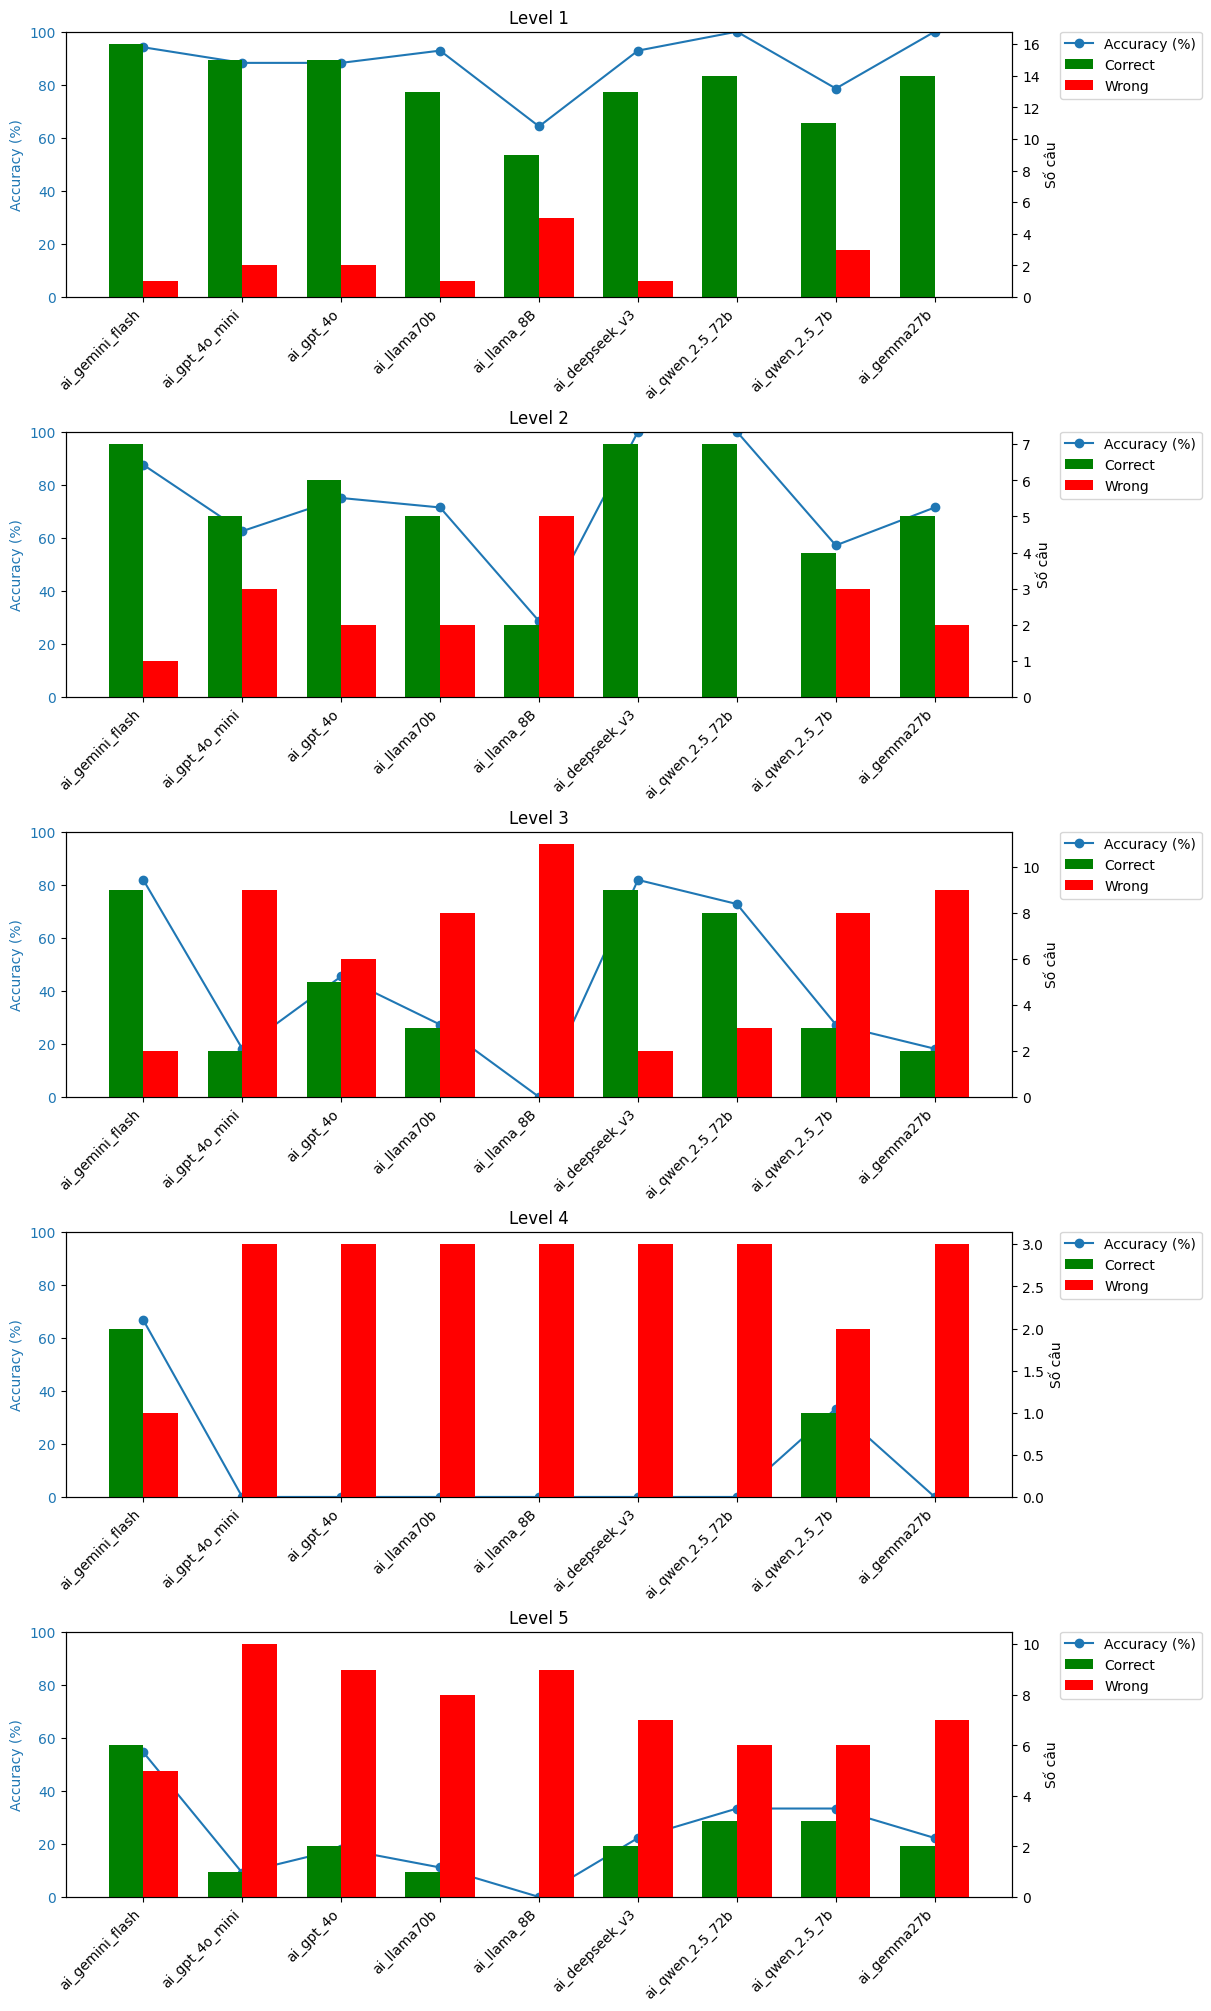

In [ ]:
sorted_levels = sorted(levels.items(), key=lambda x: int(x[0]))

fig, axs = plt.subplots(len(sorted_levels), 1, figsize=(12, len(sorted_levels)*4), constrained_layout=True)
if len(sorted_levels) == 1:
    axs = [axs]

for ax, (level, models_data) in zip(axs, sorted_levels):
    # Tách dữ liệu cho từng model
    model_names = [item[0] for item in models_data]
    correct = [item[1] for item in models_data]
    wrong = [item[2] for item in models_data]
    total = [c + w for c, w in zip(correct, wrong)]
    accuracy = [(c / t * 100) if t > 0 else 0 for c, t in zip(correct, total)]
    
    x = np.arange(len(model_names))
    bar_width = 0.35

    ax2 = ax.twinx()
    
    ax.plot(x, accuracy, marker='o', color='tab:blue', label='Accuracy (%)')
    ax.set_ylabel('Accuracy (%)', color='tab:blue')
    ax.tick_params(axis='y', labelcolor='tab:blue')
    ax.set_ylim(0, 100)

    ax2.bar(x - bar_width/2, correct, bar_width, color='green', label='Correct')
    ax2.bar(x + bar_width/2, wrong, bar_width, color='red', label='Wrong')
    ax2.set_ylabel('Số câu', color='black')
    ax2.tick_params(axis='y', labelcolor='black')
    
    ax.set_title(f'Level {level}')
    ax.set_xticks(x)
    ax.set_xticklabels(model_names, rotation=45, ha='right')
    
    lines, labels = ax.get_legend_handles_labels()
    bars, bar_labels = ax2.get_legend_handles_labels()
    ax.legend(lines + bars, labels + bar_labels, loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)

plt.show()